# Boston House Prices

In [115]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
%matplotlib inline

In [116]:
train = pd.read_csv('./train.csv')      #1460*81
test = pd.read_csv('./test.csv')        #1459*80

train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

train.shape, test.shape

((1460, 80), (1459, 79))

In [117]:
train = pd.read_csv('./train.csv')      #1460*81
test = pd.read_csv('./test.csv')        #1459*80

train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

train.shape, test.shape

((1460, 80), (1459, 79))

In [118]:
y = train['SalePrice']

y = np.log(y, where=y != 0)

train = train.drop('SalePrice', axis=1)
all_features = pd.concat([train, test], ignore_index=True)

In [119]:
for col in all_features.columns:
    if all_features[col].isna().sum():
        print(f'{col} : {all_features[col].isna().sum()}개')

MSZoning : 4개
LotFrontage : 486개
Alley : 2721개
Utilities : 2개
Exterior1st : 1개
Exterior2nd : 1개
MasVnrType : 24개
MasVnrArea : 23개
BsmtQual : 81개
BsmtCond : 82개
BsmtExposure : 82개
BsmtFinType1 : 79개
BsmtFinSF1 : 1개
BsmtFinType2 : 80개
BsmtFinSF2 : 1개
BsmtUnfSF : 1개
TotalBsmtSF : 1개
Electrical : 1개
BsmtFullBath : 2개
BsmtHalfBath : 2개
KitchenQual : 1개
Functional : 2개
FireplaceQu : 1420개
GarageType : 157개
GarageYrBlt : 159개
GarageFinish : 159개
GarageCars : 1개
GarageArea : 1개
GarageQual : 159개
GarageCond : 159개
PoolQC : 2909개
Fence : 2348개
MiscFeature : 2814개
SaleType : 1개


In [120]:
'''
all_features['Functional'] = all_features['Functional'].fillna('Typ')
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")
all_features['KitchenQual'] = all_features['KitchenQual'].fillna("TA")
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0])
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])
all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

all_features["PoolQC"] = all_features["PoolQC"].fillna("None")
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_features[col] = all_features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_features[col] = all_features[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_features[col] = all_features[col].fillna('None')

for col in all_features.columns:
    if all_features[col].isna().sum():
        print(f'{col} : {all_features[col].isna().sum()}개')
all_features = all_features.drop(['LotFrontage','Alley','FireplaceQu','Fence','MiscFeature'], axis=1)
cnt = 0
for col in all_features.columns:
    if all_features[col].isna().sum():
        all_features[col] = all_features[col].fillna(all_features[col].mode()[0])
    if all_features[col].isna().sum():
        cnt +=1
        print(col)
print(f'null값이 존재하는 컬럼 개수 : {cnt}개')
'''


'\nall_features[\'Functional\'] = all_features[\'Functional\'].fillna(\'Typ\')\nall_features[\'Electrical\'] = all_features[\'Electrical\'].fillna("SBrkr")\nall_features[\'KitchenQual\'] = all_features[\'KitchenQual\'].fillna("TA")\nall_features[\'Exterior1st\'] = all_features[\'Exterior1st\'].fillna(all_features[\'Exterior1st\'].mode()[0])\nall_features[\'Exterior2nd\'] = all_features[\'Exterior2nd\'].fillna(all_features[\'Exterior2nd\'].mode()[0])\nall_features[\'SaleType\'] = all_features[\'SaleType\'].fillna(all_features[\'SaleType\'].mode()[0])\nall_features[\'MSZoning\'] = all_features.groupby(\'MSSubClass\')[\'MSZoning\'].transform(lambda x: x.fillna(x.mode()[0]))\n\nall_features["PoolQC"] = all_features["PoolQC"].fillna("None")\nfor col in (\'GarageYrBlt\', \'GarageArea\', \'GarageCars\'):\n    all_features[col] = all_features[col].fillna(0)\nfor col in [\'GarageType\', \'GarageFinish\', \'GarageQual\', \'GarageCond\']:\n    all_features[col] = all_features[col].fillna(\'None\'

In [121]:
# 범주형 데이터 추출
categorical_features = all_features.select_dtypes(include=['object'])

# 수치형 데이터 추출
numeric_features = all_features.select_dtypes(exclude=['object'])
#numeric_features = numeric_features.apply(lambda x: (x - x.mean()) / (x.std()))
numeric_features = numeric_features.fillna(0)
numeric_features.shape

(2919, 36)

In [122]:
categorical_L = []
categorical_len = []

for col in categorical_features.columns:
    f_dic = {}
    for i,v in enumerate(categorical_features[col].unique()):
        f_dic[v] = i
    em = categorical_features[col].map(f_dic)
    categorical_L.append(em)
    categorical_len.append(len(categorical_features[col].unique()))

categorical_features = np.stack(categorical_L,1)
categorical_features.shape , numeric_features.shape

((2919, 43), (2919, 36))

In [123]:
categorical_features_size = []
for x in categorical_len:
    categorical_features_size.append((x,x//2))
#categorical_features_size

In [124]:
all_features = np.concatenate([categorical_features,numeric_features],1)
X = all_features[:len(y), :]
X_test = all_features[len(y):, :]
X.shape, y.shape, X_test.shape

((1460, 79), (1460,), (1459, 79))

모델

In [125]:
class Model(nn.Module):
    def __init__(self, embedding_size, layers,categorical_size=43,numeric_size=36):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.categorical_size = categorical_size
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        
        self.input_batch = nn.BatchNorm1d(numeric_size)

        all_layers = []
        input_size_t = num_categorical_cols+numeric_size
        for i in layers:
            all_layers.append(nn.Linear(input_size_t, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            input_size_t = i

        self.layers = nn.Sequential(*all_layers)
        self.outlayer = nn.Linear(layers[-1], 1)

    def forward(self, x):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x[:,i].long()))
        x1 = torch.cat(embeddings, 1)
        x2 = self.input_batch(x[:,self.categorical_size:])
        x = torch.cat((x1,x2),1)
        x = self.layers(x)
        x = self.outlayer(x)
        return x

In [126]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [127]:
from sklearn.model_selection import train_test_split
if type(y) == type(pd.Series()):
    y=y.to_numpy()
X_train , X_val , y_train , y_val = train_test_split(X, y,test_size=0.2, shuffle=True,random_state=5252)

y_val = torch.tensor(y_val).float().to(device).unsqueeze(1) # Unsqueeze to match the shape of the output of our model
X_val = torch.tensor(X_val).float().to(device)

y_train = torch.tensor(y_train).float().to(device).unsqueeze(1) # Unsqueeze to match the shape of the output of our model
X_train = torch.tensor(X_train).float().to(device)
dataset = TensorDataset(X_train, y_train) # Make X,y into dataset so we can work with DataLoader which iterate our data in batch size
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

X_test= torch.tensor(X_test).float().to(device)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape)


torch.Size([1168, 79]) torch.Size([1168, 1])
torch.Size([292, 79]) torch.Size([292, 1])
torch.Size([1459, 79])


C:\Users\minki\AppData\Local\Temp\ipykernel_15252\2701191397.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(y) == type(pd.Series()):


In [128]:
sum([b for a,b in categorical_features_size])

127

In [129]:
model = Model(categorical_features_size,[200,200,200,200])
model.to(device)

#optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.9, weight_decay=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 0.95 ** epoch)
criterion = nn.MSELoss() 

In [130]:
train_losses = [] 
val_losses = [] 
epochs = 300

X_val , y_val = X_val.to(device) , y_val.to(device)

for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X , y = X.to(device) , y.to(device)
        y_pred = model(X) 
        loss = criterion(y_pred, y) 
        running_loss += loss.item()
        
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
    scheduler.step()
    
    train_losses.append(running_loss/(batch + 1))

    model.eval()
    with torch.no_grad():
        y_pred = model(X_val)
        val_loss = criterion(y_pred, y_val).item()
        val_losses.append(val_loss)
    print(f'{epoch} : {train_losses[-1]:.5f} {val_losses[-1]:.5f}')
    torch.save(model.state_dict(), os.path.join('./model_data/', '{0:0=2d}.pth'.format(epoch)))

0 : 131.70142 99.84677
1 : 65.77686 27.43522
2 : 9.41126 24.72528
3 : 0.39565 0.42318
4 : 0.13699 0.15306
5 : 0.10799 0.67171
6 : 0.08476 0.43080
7 : 0.09546 0.67740
8 : 0.07777 1.20411
9 : 0.06302 0.94639
10 : 0.07449 0.80473
11 : 0.05665 0.24825
12 : 0.05049 0.11856
13 : 0.05803 1.69227
14 : 0.04795 0.72815
15 : 0.04806 0.22272
16 : 0.05843 0.29927
17 : 0.04453 0.19757
18 : 0.05129 0.23171
19 : 0.04244 0.05116
20 : 0.04264 2.91837
21 : 0.03674 0.10867
22 : 0.03536 0.09205
23 : 0.03566 0.07940
24 : 0.03906 0.11530
25 : 0.03827 0.06182
26 : 0.03476 0.07006
27 : 0.03490 0.06116
28 : 0.03350 0.05890
29 : 0.03421 0.52453
30 : 0.03612 0.49473
31 : 0.03255 0.09693
32 : 0.03292 0.11827
33 : 0.03005 0.04344
34 : 0.02997 0.05821
35 : 0.03071 0.11413
36 : 0.03313 0.30122
37 : 0.02745 0.07427
38 : 0.02876 0.10326
39 : 0.02794 0.08432
40 : 0.02875 0.07731
41 : 0.03209 0.42360
42 : 0.02369 0.05503
43 : 0.02716 0.03873
44 : 0.02438 0.05648
45 : 0.02763 0.10660
46 : 0.02551 0.05763
47 : 0.02698 0.05

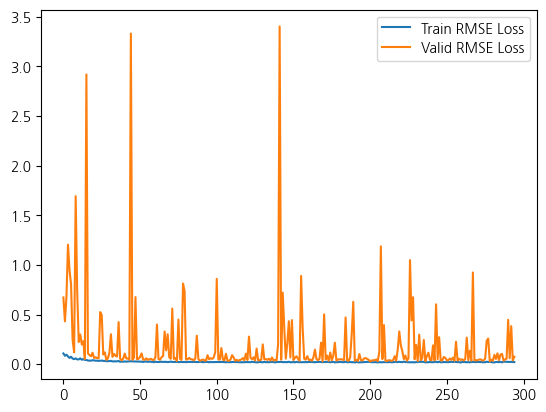

In [131]:
sns.lineplot(train_losses[5:], label='Train RMSE Loss')
sns.lineplot(val_losses[5:], label='Valid RMSE Loss')
plt.legend()
plt.show()

In [132]:
# test
best_epoch = np.argmin(np.array(val_losses)) + 1
print(f'최적의 epoch는 {best_epoch} loss:{val_losses[best_epoch-1]:.5f}')
model.load_state_dict(torch.load(os.path.join('./model_data/', '{0:0=2d}.pth'.format(best_epoch))))
model.eval()
output = model(X_test)
output.shape

최적의 epoch는 206 loss:0.02691


torch.Size([1459, 1])

In [133]:
output = torch.exp(output)
output = output.cpu().detach().numpy()

In [134]:
sub = pd.read_csv('./sample_submission.csv')
sub['SalePrice'] = output

In [135]:
sub.to_csv('answer12.csv', index=False)